<a href="https://colab.research.google.com/github/NguyenQuanManh/TTNT/blob/main/Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_rice=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
rice_set=train_rice.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Rice/Train',
                                               target_size=(150,150), batch_size=32, class_mode='categorical')
val=train_rice.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data/Rice/val',
                                          target_size=(150,150), batch_size=32, class_mode='categorical')

Found 900 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 19, 19, 128)     

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(rice_set, epochs=100, batch_size=128)

Epoch 1/100
29/29 [==============================] - 331s 11s/step - loss: 1.7878 - accuracy: 0.3489
Epoch 2/100
29/29 [==============================] - 7s 224ms/step - loss: 0.8463 - accuracy: 0.6400
Epoch 3/100
29/29 [==============================] - 8s 267ms/step - loss: 0.6016 - accuracy: 0.7422
Epoch 4/100
29/29 [==============================] - 6s 220ms/step - loss: 0.5627 - accuracy: 0.7744
Epoch 5/100
29/29 [==============================] - 6s 218ms/step - loss: 0.4343 - accuracy: 0.8111
Epoch 6/100
29/29 [==============================] - 6s 220ms/step - loss: 0.4544 - accuracy: 0.7956
Epoch 7/100
29/29 [==============================] - 6s 221ms/step - loss: 0.4202 - accuracy: 0.8222
Epoch 8/100
29/29 [==============================] - 7s 231ms/step - loss: 0.4130 - accuracy: 0.8400
Epoch 9/100
29/29 [==============================] - 6s 221ms/step - loss: 0.3775 - accuracy: 0.8411
Epoch 10/100
29/29 [==============================] - 7s 231ms/step - loss: 0.3776 - accura

In [ ]:
model.save('rice.h5')

In [ ]:
model_h5=load_model('rice.h5')

1/1 [==============================] - 0s 17ms/step
Đây là loại: Gạo lứt đen


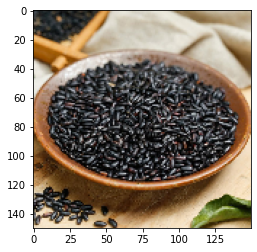

In [ ]:
img = load_img('/content/gao.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_h5.predict(img)
class_name=['Gao Ý','Gạo tẻ','Gạo lứt đen','Gạo lài','Gạo thơm']
a= int(np.argmax(result,axis=1))
print("Đây là loại:", class_name[a])

In [ ]:
! jupyter nbconvert --to html /content/Rice.ipynb

[NbConvertApp] Converting notebook /content/Rice.ipynb to html
[NbConvertApp] Writing 456976 bytes to /content/Rice.html
